In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [178]:
# loading the Review Data

In [179]:
df=pd.read_csv("Electric_Vehicle_Review_Data.csv")
df_copy=pd.read_csv("Electric_Vehicle_Review_Data.csv")
df.head(20)

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
5,28,Pune,Working Professional,Single,Graduate,5,2.945694e+06,Maybe,SUV,Yes,Volkswagen,<15 lakhs,2,"Yes, in <10 years"
6,23,Pune,Working Professional,Married,Graduate,3,2.686745e+06,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
7,25,Pune,NaN,Married,Post Graduate,4,2.034627e+06,Yes,Sedan,Yes,MG,<5 lakhs,4,"Yes, in <10 years"
8,43,Noida,NaN,Single,Graduate,2,2.040275e+06,Yes,SUV,Yes,Volkswagen,<15 lakhs,2,"Yes, in <20years"
9,27,Pune,Working Professional,Single,Graduate,4,5.628716e+05,Yes,Sedan,Yes,Tata,<15 lakhs,4,"Yes, in <10 years"


In [180]:
df.shape

(1000, 14)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   1000 non-null   int64  
 1   City                                                                  1000 non-null   object 
 2   Profession                                                            540 non-null    object 
 3   Marital Status                                                        1000 non-null   object 
 4   Education                                                             1000 non-null   object 
 5   No. of Family members                                                 1000 non-null   int64  
 6   Annual Income                                                         1000 non-null   float64
 7 

#### Missing Value Check

In [182]:
df.isnull().sum()

Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you prefer replacing all your vehicles to Electronic vehicles?      0
If Yes/Maybe what type of  EV would you prefer?                           0
Do you think Electronic Vehicles are economical?                          0
Which brand of vehicle do you currently own?                              0
How much money could you spend on an Electronic vehicle?                  0
Preference for wheels in EV                                               0
Do you think

In [183]:
df['Profession'].fillna('Other', inplace=True)

In [184]:
df.head(10)

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Other,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,Other,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Other,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Other,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
5,28,Pune,Working Professional,Single,Graduate,5,2.945694e+06,Maybe,SUV,Yes,Volkswagen,<15 lakhs,2,"Yes, in <10 years"
6,23,Pune,Working Professional,Married,Graduate,3,2.686745e+06,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
7,25,Pune,Other,Married,Post Graduate,4,2.034627e+06,Yes,Sedan,Yes,MG,<5 lakhs,4,"Yes, in <10 years"
8,43,Noida,Other,Single,Graduate,2,2.040275e+06,Yes,SUV,Yes,Volkswagen,<15 lakhs,2,"Yes, in <20years"
9,27,Pune,Working Professional,Single,Graduate,4,5.628716e+05,Yes,Sedan,Yes,Tata,<15 lakhs,4,"Yes, in <10 years"


In [185]:
# Description about the numerical Data
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,31.800000,4.118000,2.258342e+06,3.349000
std,11.294847,1.469774,9.993558e+05,0.887686
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.782116e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.753170e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [186]:
df['No. of Family members'].dtype

dtype('int64')

In [187]:
# Description about the Categorical Data
df.describe(include="object")

,City,Profession,Marital Status,Education,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Do you think Electronic vehicles will replace fuel cars in India?
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,35,4,2,2,3,5,3,16,8,4
top,Pune,Other,Single,Graduate,Yes,SUV,Yes,Tata,<15 lakhs,"Yes, in <10 years"
freq,570,460,638,693,663,467,768,186,483,419


# EDA

### Data Visualization

<Axes: xlabel='Age', ylabel='Density'>

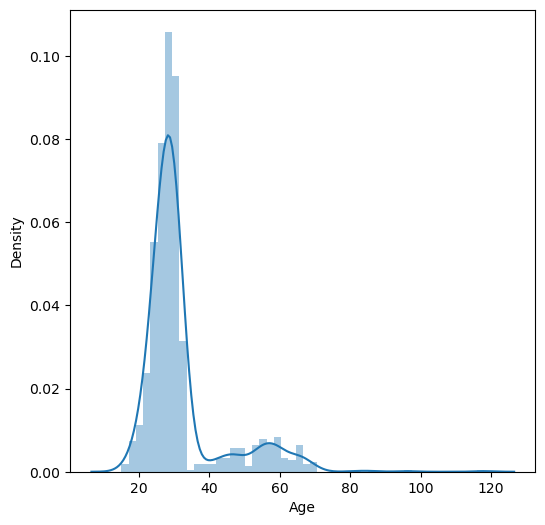

In [188]:
plt.figure(figsize=(6,6))
sns.distplot(df["Age"])

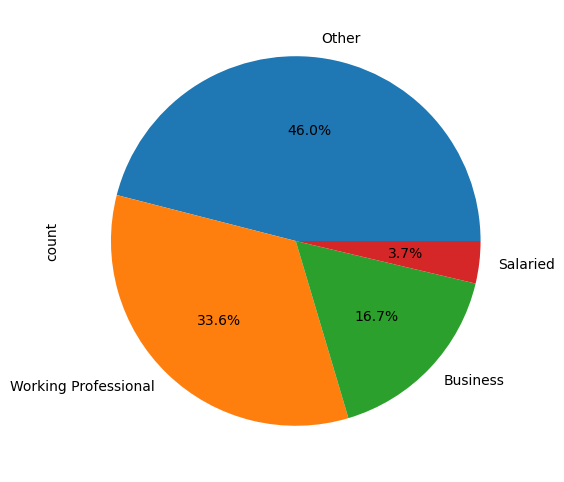

In [189]:
plt.figure(figsize=(6,6))
df["Profession"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.savefig('ocuapation.png')

<Axes: ylabel='count'>

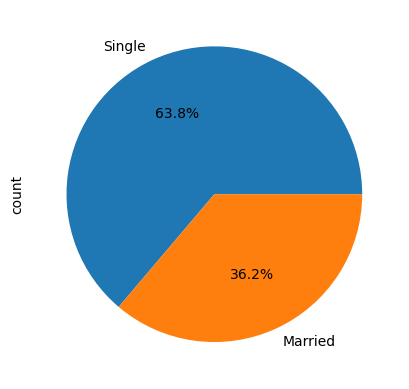

In [190]:
df["Marital Status"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [191]:
df["City"].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [192]:
df["City"]=df["City"].replace({"Pune ":"Pune","pUNE":"Pune","pune":"Pune","Pune":"Pune"})
df["City"]=df["City"].replace({"Banglore ":"Bengaluru"})
df["City"]=df["City"].replace({"Hakdwani":"Haldwani","Haldwani ":"Haldwani"})
df["City"]=df["City"].replace({"New Delhi ":"Delhi","Delhi ":"Delhi"})
df["City"]=df["City"].replace({"nashik":"Nashik"})
df["City"]=df["City"].replace({"Mumbai ":"Mumbai"})

In [193]:
df["City"].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'solapur', 'Haldwani', 'Nellore ', 'Bengaluru', 'Faridabad ',
       'Nagpur', 'Chandrapur ', 'Chennai', 'Gurugram ', 'Nashik',
       'Patiyala', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'Jalandhar'], dtype=object)

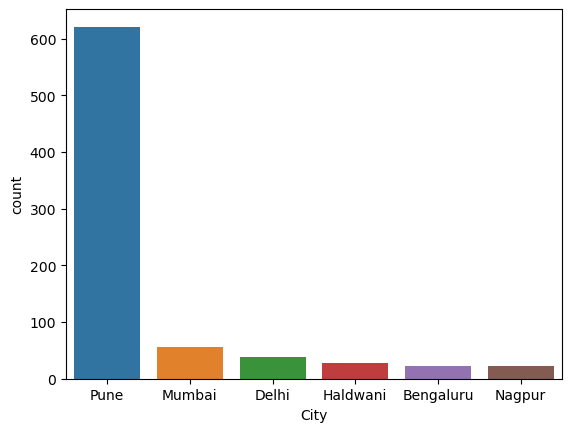

In [194]:
# bar plot for city
sns.countplot(x="City",data=df,order=df.City.value_counts().iloc[:6].index)
plt.savefig('city.png')

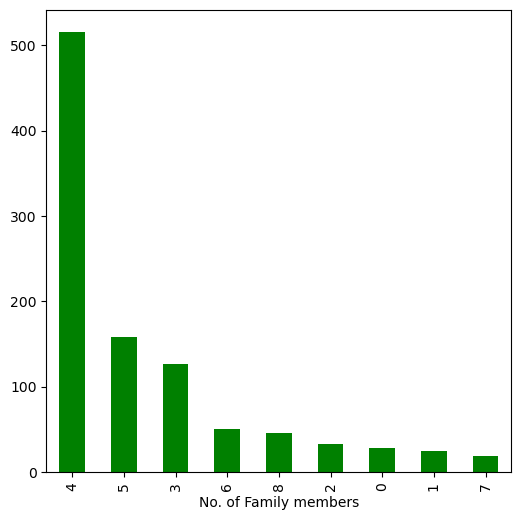

In [195]:
# bar plot for No. of Family Members
plt.figure(figsize=(6,6))
df["No. of Family members"].value_counts().plot(kind="bar",color="green")
plt.show()

<Axes: xlabel='Annual Income', ylabel='Count'>

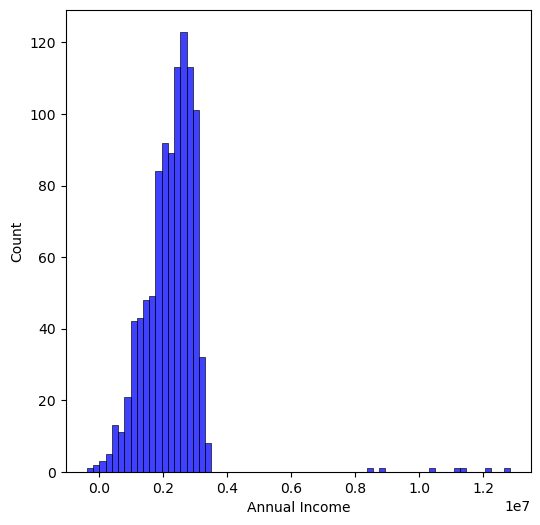

In [196]:
# histogram for Annual Income
plt.figure(figsize=(6,6))
sns.histplot(df["Annual Income"],color="blue")

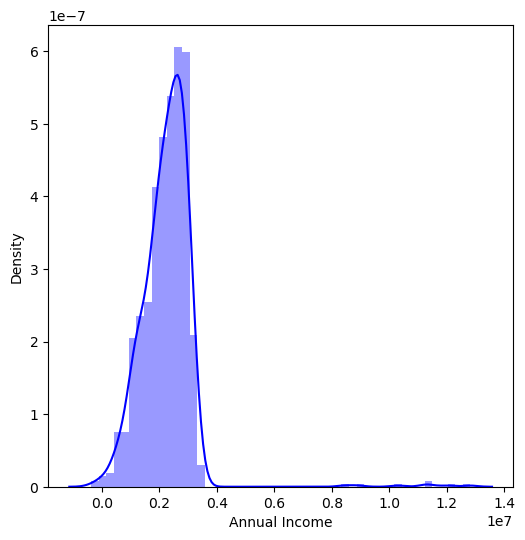

In [197]:
plt.figure(figsize=(6,6))
sns.distplot(df["Annual Income"],color="blue")
plt.show()

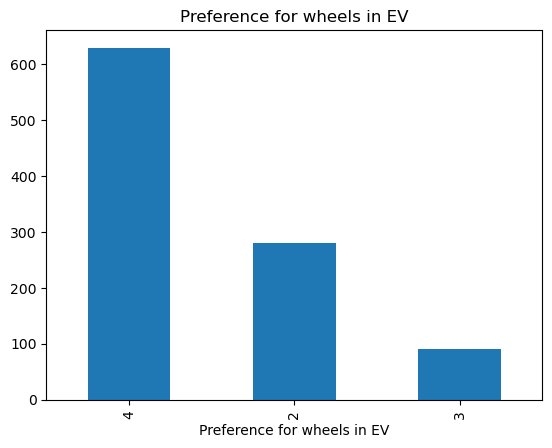

In [198]:
df["Preference for wheels in EV"].value_counts().plot(kind="bar")
plt.title('Preference for wheels in EV')
plt.show()

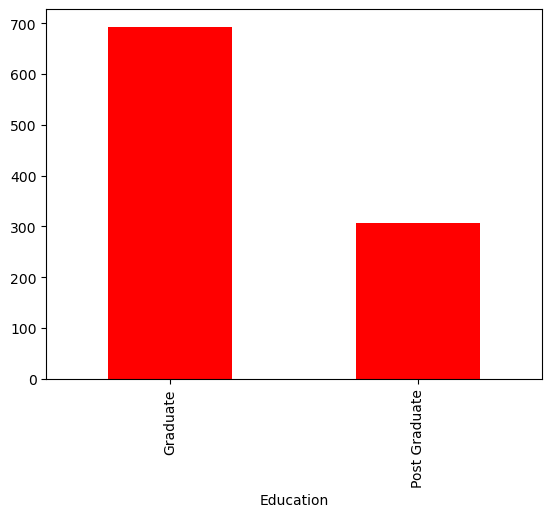

In [199]:
# barplot for Eduaction Level
df["Education"].value_counts().plot(kind="bar",color="red")
plt.show()

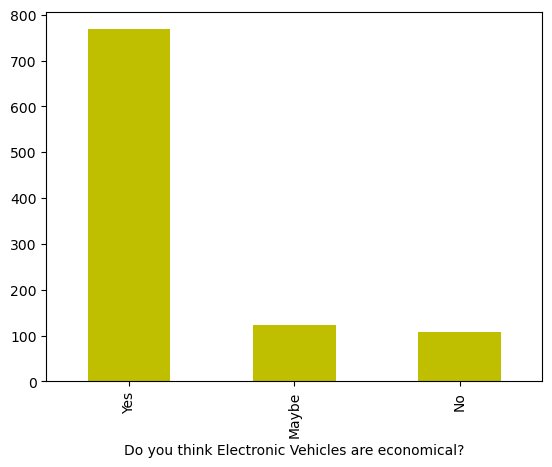

In [200]:
df["Do you think Electronic Vehicles are economical?"].value_counts().plot(kind="bar",color="y")
plt.show()

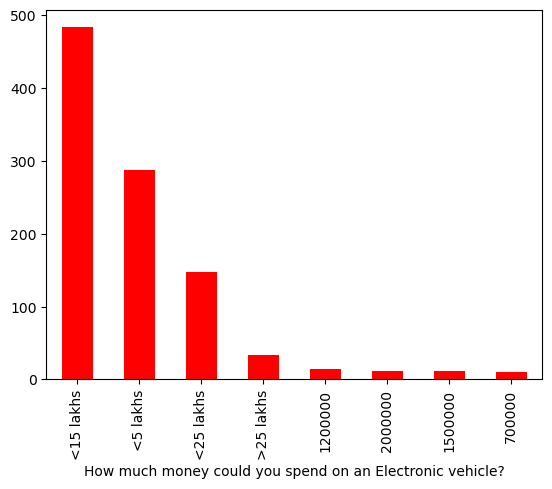

In [201]:
df["How much money could you spend on an Electronic vehicle?"].value_counts().plot(kind="bar",color='red')
plt.show()

In [202]:
df["Which brand of vehicle do you currently own?"].unique()

array(['Hyundai', 'Honda', 'KIA', 'McLaren ', 'Volkswagen', 'MG', 'Tata',
       'Nissan', 'Chevrolet ', 'Suzuki ', 'Maruti', 'Maruti ',
       'Maruti Suzuki', 'Nexa', 'Audi', 'BMW'], dtype=object)

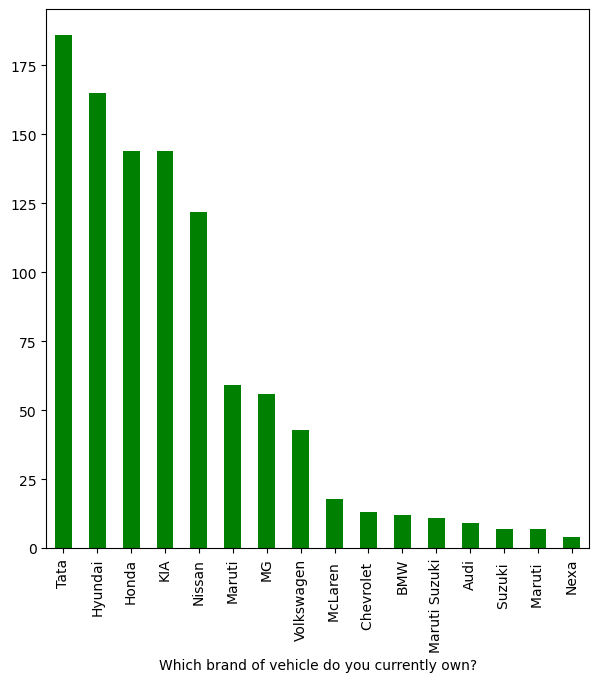

In [203]:
plt.figure(figsize=(7,7))
df["Which brand of vehicle do you currently own?"].value_counts().plot(kind="bar",color='green')
plt.savefig('currently_own_brand.png')

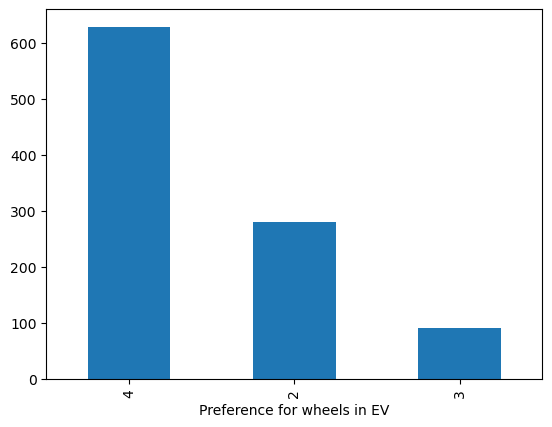

In [204]:
df['Preference for wheels in EV'].value_counts().plot(kind='bar')
plt.savefig('Preference_for_wheels.png')

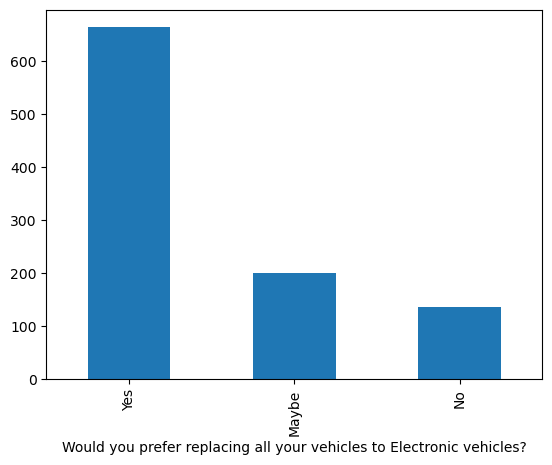

In [205]:
df['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts().plot(kind='bar')
plt.show()

In [206]:
df.columns = df.columns.str.strip()
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

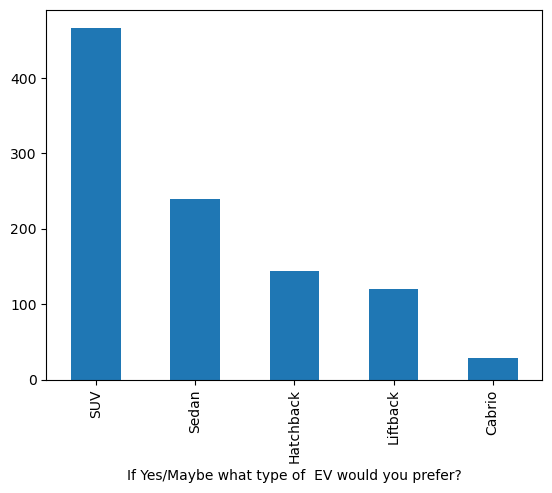

In [207]:
df['If Yes/Maybe what type of  EV would you prefer?'].value_counts().plot(kind='bar')
plt.savefig('Preferable_EV_Brand.png')

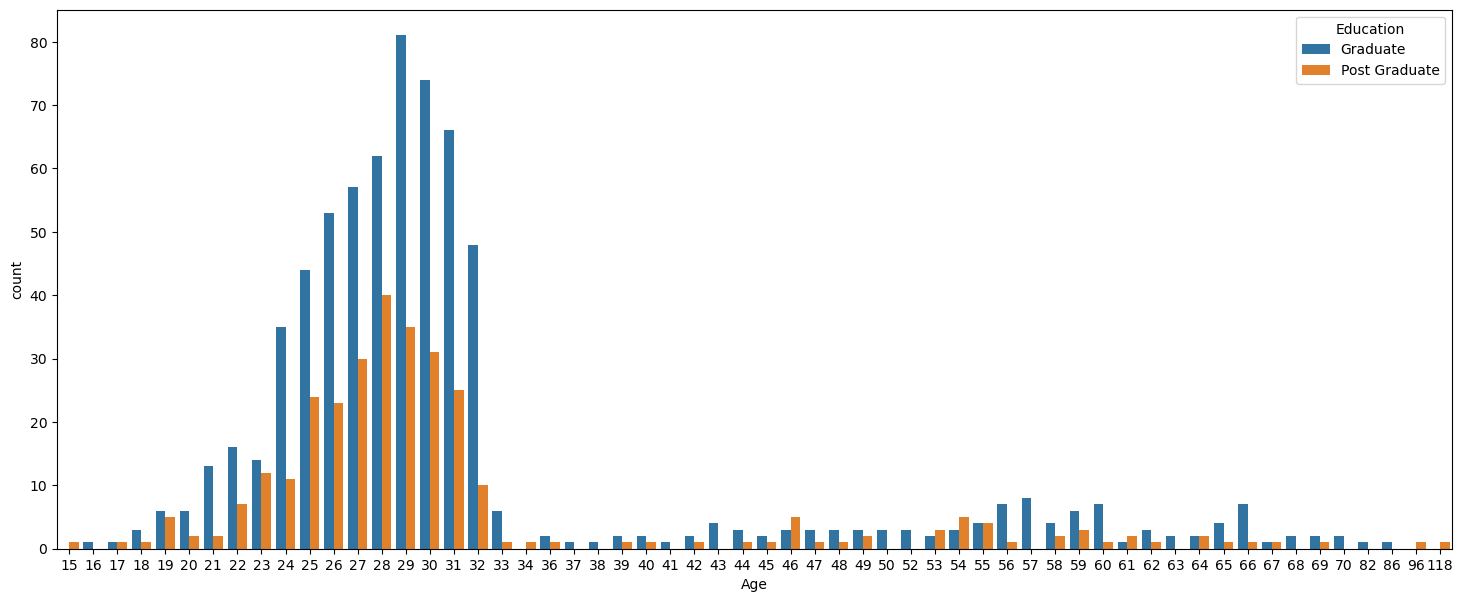

In [208]:
plt.figure(figsize=(18,7))
sns.countplot(x="Age",data=df,hue="Education")
plt.show()

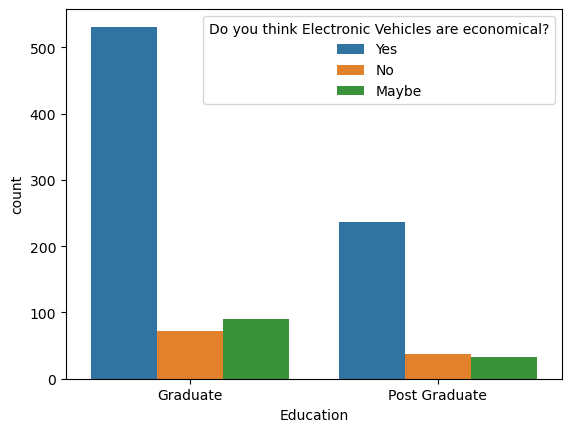

In [209]:
sns.countplot(x="Education",data=df,hue="Do you think Electronic Vehicles are economical?")
plt.savefig('econimical.png')

<Axes: xlabel='No. of Family members', ylabel='count'>

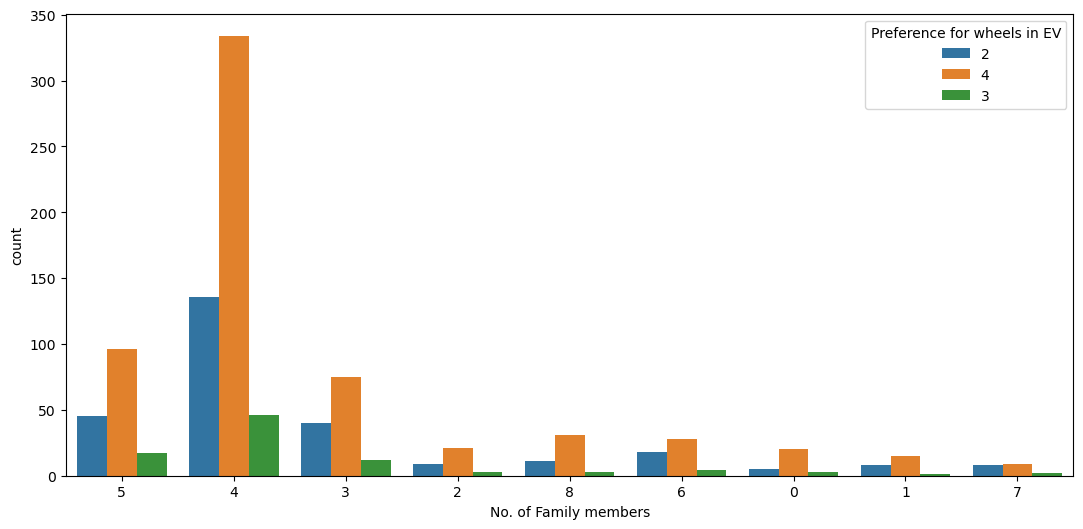

In [210]:
df['No. of Family members'] = df['No. of Family members'].astype(str)
df['Preference for wheels in EV'] = df['Preference for wheels in EV'].astype(str)
plt.figure(figsize=(13,6))
sns.countplot(x="No. of Family members",data=df,hue="Preference for wheels in EV")

##people having family member more than 2 highly recommend for 4 wheelers
## Less number of people refer for 3 wheelers

In [211]:
# df['No. of Family members'] = df['No. of Family members'].astype(np.int64)
# df['Preference for wheels in EV'] = df['Preference for wheels in EV'].astype(np.int64)

In [212]:
print(df_copy['No. of Family members'].dtype)

int64


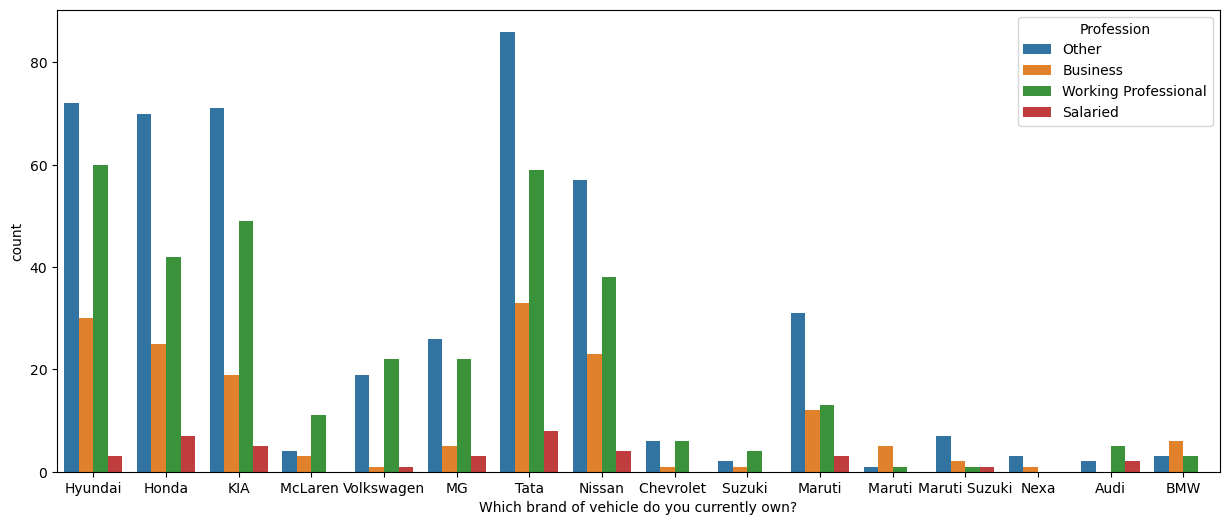

In [213]:
plt.figure(figsize=(15,6))
sns.countplot(x="Which brand of vehicle do you currently own?",data=df,hue="Profession")
plt.show()

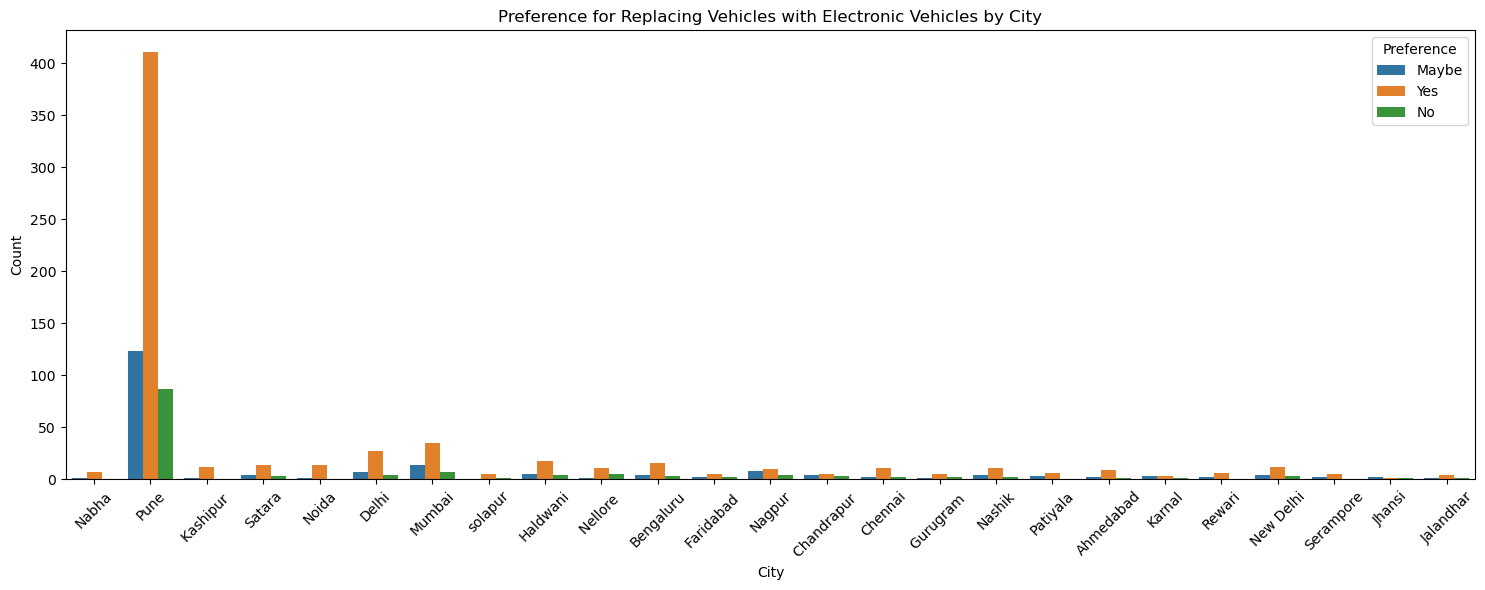

In [214]:
df["City"] = df["City"].astype(str)
df["Would you prefer replacing all your vehicles to Electronic vehicles?"] = df["Would you prefer replacing all your vehicles to Electronic vehicles?"].astype(str)
# Plotting the count plot
plt.figure(figsize=(15, 6))
sns.countplot(x="City", data=df, hue="Would you prefer replacing all your vehicles to Electronic vehicles?")
plt.title("Preference for Replacing Vehicles with Electronic Vehicles by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="Preference")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('city_yes.png')

### Correlation

In [215]:
df['No. of Family members'] = df['No. of Family members'].astype(np.int64)
df['Preference for wheels in EV'] = df['Preference for wheels in EV'].astype(np.int64)

In [216]:
df['Preference for wheels in EV'].dtype

dtype('int64')

In [217]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix =numerical_df.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                                  Age  No. of Family members  Annual Income  \
Age                          1.000000               0.023914      -0.012452   
No. of Family members        0.023914               1.000000       0.027894   
Annual Income               -0.012452               0.027894       1.000000   
Preference for wheels in EV  0.028134              -0.020855      -0.023151   

                             Preference for wheels in EV  
Age                                             0.028134  
No. of Family members                          -0.020855  
Annual Income                                  -0.023151  
Preference for wheels in EV                     1.000000  


## Label Encoding

In [218]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data,column):
    label_encoder=LabelEncoder()
    return label_encoder.fit_transform(data[column].astype(str))

In [219]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Other,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,Other,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Other,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Other,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [220]:
df['City']= label_encoder(df,'City')
df['Profession']= label_encoder(df,'Profession')
df['Marital Status']= label_encoder(df,'Marital Status')
df['Education']= label_encoder(df,'Education')

In [221]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,13,1,1,0,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,20,1,1,0,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,11,1,1,0,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,20,0,1,0,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,22,1,1,0,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [222]:
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encoder(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encoder(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encoder(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encoder(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encoder(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encoder(df,'How much money could you spend on an Electronic vehicle?')

In [223]:
df.sample(5)

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
891,21,20,1,1,0,4,1935637.659,0,3,2,12,6,4,3
375,28,20,1,0,0,4,2643963.672,2,4,2,14,5,2,1
544,27,20,3,1,0,4,1903629.362,2,3,1,12,6,4,2
517,30,20,3,0,0,4,2884061.797,2,3,2,5,7,2,1
383,28,12,3,1,0,4,1238983.296,1,3,2,4,4,4,0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   1000 non-null   int64  
 1   City                                                                  1000 non-null   int32  
 2   Profession                                                            1000 non-null   int32  
 3   Marital Status                                                        1000 non-null   int32  
 4   Education                                                             1000 non-null   int32  
 5   No. of Family members                                                 1000 non-null   int64  
 6   Annual Income                                                         1000 non-null   float64
 7 

# PCA and Clustering

### Checking for Variance Inflation Factor


In [225]:
X =df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(1000, 14)

In [226]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(df) 
pca.explained_variance_ratio_

array([1.00000000e+00, 1.27736378e-10, 3.65110709e-11, 2.04466269e-11,
       2.16191194e-12, 1.51107368e-12, 1.26970387e-12, 1.10943732e-12,
       7.79537142e-13, 6.53326450e-13, 6.25140152e-13, 4.63977105e-13,
       2.30194903e-13, 2.10546109e-13])

In [227]:
y=df["City"]
x=df.drop(["City"],axis=1)
print(x.shape)

(1000, 13)


In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#x = x.iloc[:, :-1]
x = x.apply(pd.to_numeric, errors='coerce')
# Handle missing values by filling them with the mean of the column
x = x.fillna(x.mean())
# Function to calculate VIF
def vif(x):
    vif_data = pd.DataFrame()
    vif_data['variables'] = x.columns
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data

In [229]:
vif_data = vif(x)
print(vif_data)

                                            variables        VIF
0                                                 Age   7.980593
1                                          Profession   2.900169
2                                      Marital Status   2.711295
3                                           Education   1.447308
4                               No. of Family members   8.240316
5                                       Annual Income   5.723208
6   Would you prefer replacing all your vehicles t...   4.131521
7     If Yes/Maybe what type of  EV would you prefer?   7.107357
8    Do you think Electronic Vehicles are economical?   6.252167
9        Which brand of vehicle do you currently own?   3.855888
10  How much money could you spend on an Electroni...  13.054117
11                        Preference for wheels in EV  12.511614
12  Do you think Electronic vehicles will replace ...   4.714023


In [230]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled.shape

(1000, 13)

In [231]:
pca = PCA()    #creating the instance of class PCA
pca.fit_transform(X_scaled) 
pca.explained_variance_ratio_

array([0.09199588, 0.08758993, 0.0849116 , 0.08244954, 0.07874505,
       0.07806886, 0.07642054, 0.07504586, 0.07205557, 0.0695476 ,
       0.06905359, 0.06806753, 0.06604847])

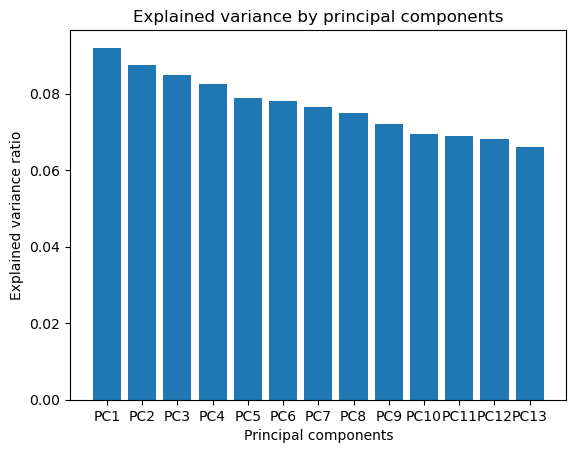

In [232]:
components=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.savefig('Pca.png')

In [88]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df)
data2 = pd.DataFrame(pca_data, columns=['PC1', 'PC2','PC3','PC4'])
data2.head()

,PC1,PC2,PC3,PC4
0,-1.064466e+06,-1.988454,3.638434,3.526987
1,-4.138014e+05,-4.898199,-3.231311,4.876692
2,6.898083e+05,0.258903,5.777938,2.516288
3,5.740379e+05,23.259288,-3.084549,4.231759
4,3.804088e+05,-5.713584,-5.537082,-1.952213


## Dendrogram for Heirarchical Clustering

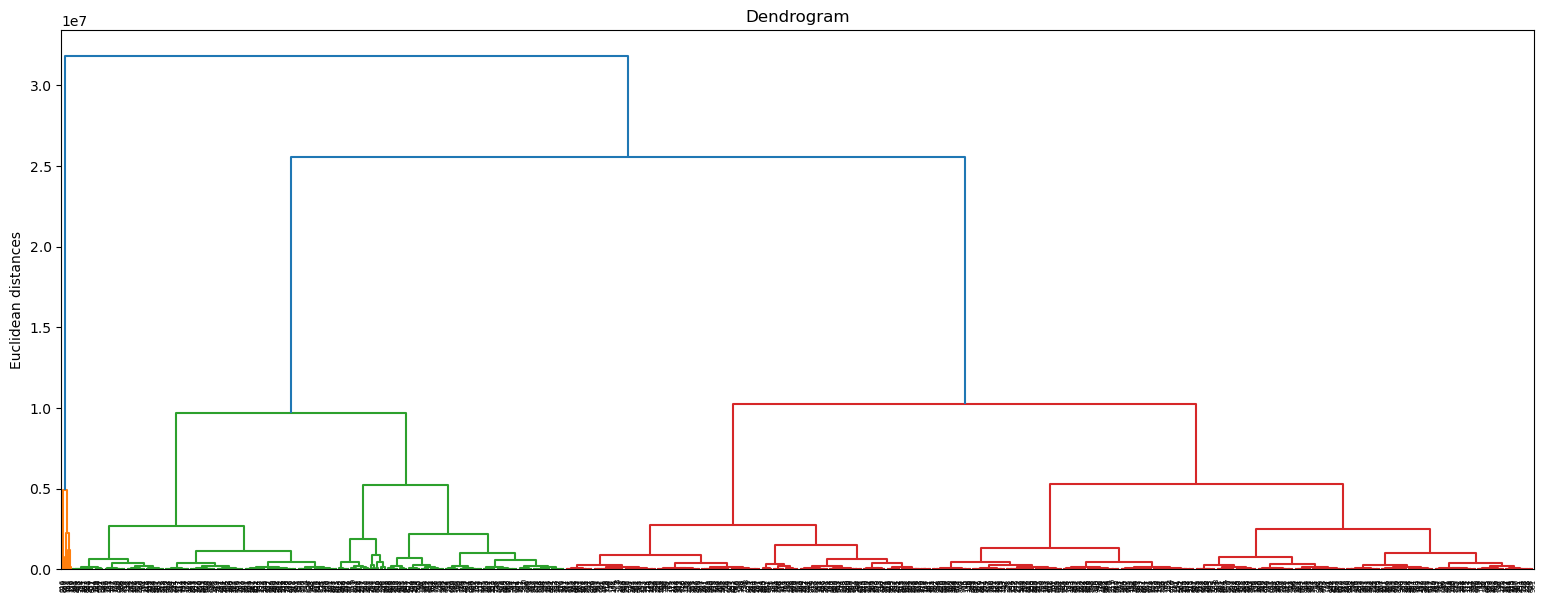

In [233]:
plt.figure(figsize=(19,7))
dendrogram = sch.dendrogram(sch.linkage(data2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.savefig('dendrogram.png')

## Elbow Method

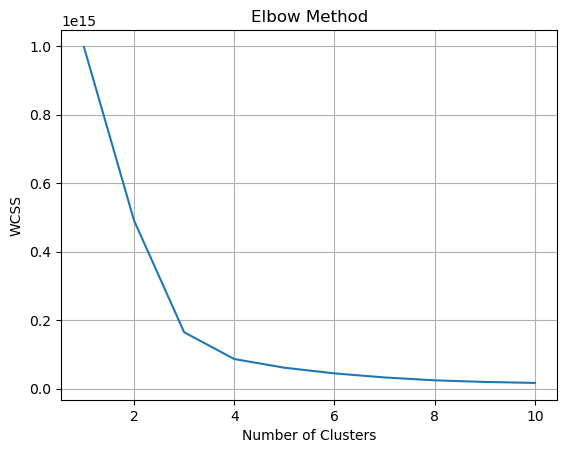

In [90]:
from sklearn.cluster import KMeans

# Determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.savefig('Elbow_Curve.png')

In [91]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

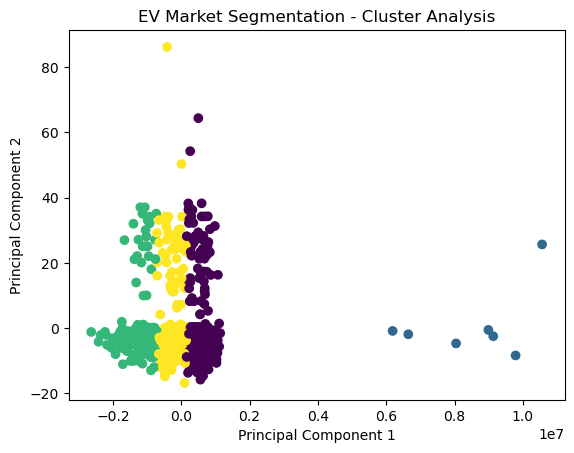

In [92]:
df['Cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('EV Market Segmentation - Cluster Analysis')
plt.savefig('Customer Segmentation-Clusters.png')

## Making Prediction

In [93]:
kmeans_predict=KMeans(n_clusters=4,random_state=123)
clusters=kmeans_predict.fit_predict(df)
df_copy["Clusters"]=clusters

In [94]:
df_copy["Clusters"].value_counts()

Clusters
0    452
1    360
3    181
2      7
Name: count, dtype: int64

In [95]:
df_copy["City"]=df_copy["City"].replace({"Pune ":"Pune","pUNE":"Pune","pune":"Pune","Pune":"Pune"})
df_copy["City"]=df_copy["City"].replace({"Banglore ":"Bengaluru"})
df_copy["City"]=df_copy["City"].replace({"Hakdwani":"Haldwani","Haldwani ":"Haldwani"})
df_copy["City"]=df_copy["City"].replace({"New Delhi ":"Delhi","Delhi ":"Delhi"})
df_copy["City"]=df_copy["City"].replace({"nashik":"Nashik"})
df_copy["City"]=df_copy["City"].replace({"Mumbai ":"Mumbai"})

### Bifurcating the data according to the cluster

In [96]:
Cluster_0=df_copy[df_copy.Clusters==0]
Cluster_1=df_copy[df_copy.Clusters==1]
Cluster_2=df_copy[df_copy.Clusters==2]
Cluster_3=df_copy[df_copy.Clusters==3]

# Demographic Segment

#### Age Factor

In [97]:
[Cluster_0["Age"].value_counts().head(),
Cluster_1["Age"].value_counts().head(),
Cluster_2["Age"].value_counts().head(),
Cluster_3["Age"].value_counts().head()]
# Age group of 28-31 needs to be targeted because they are presented in all the clusters

[Age
 29    51
 28    46
 30    45
 25    41
 26    39
 Name: count, dtype: int64,
 Age
 29    43
 28    41
 27    36
 30    36
 31    35
 Name: count, dtype: int64,
 Age
 30    2
 26    1
 29    1
 56    1
 28    1
 Name: count, dtype: int64,
 Age
 31    26
 30    22
 29    21
 27    16
 28    14
 Name: count, dtype: int64]

### Profession

In [101]:
[Cluster_0["Profession"].value_counts().head(),
Cluster_1["Profession"].value_counts().head(),
Cluster_2["Profession"].value_counts().head(),
Cluster_3["Profession"].value_counts().head()]
## Working Professionals and businessMen should be targeted most

[Profession
 Working Professional    143
 Business                 76
 Salaried                 16
 Name: count, dtype: int64,
 Profession
 Working Professional    128
 Business                 62
 Salaried                 13
 Name: count, dtype: int64,
 Profession
 Working Professional    1
 Business                1
 Name: count, dtype: int64,
 Profession
 Working Professional    64
 Business                28
 Salaried                 8
 Name: count, dtype: int64]

### Education

In [234]:
cluster_education_counts=[Cluster_0["Education"].value_counts().head(),
Cluster_1["Education"].value_counts().head(),
Cluster_2["Education"].value_counts().head(),
Cluster_3["Education"].value_counts().head()]
cluster_education_counts

# fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
# fig.suptitle('Education Distribution in Clusters')
# for i, counts in enumerate(cluster_education_counts):
#     ax = axs[i // 2, i % 2]
#     counts.plot(kind='pie', ax=ax)
#     ax.set_title(f'Cluster {i}')
#     ax.set_xlabel('Education')
#     ax.set_ylabel('Count')
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig('clusters_for_education.png')
## Garduate people should be targeted most

[Education
 Graduate         311
 Post Graduate    141
 Name: count, dtype: int64,
 Education
 Graduate         257
 Post Graduate    103
 Name: count, dtype: int64,
 Education
 Graduate         5
 Post Graduate    2
 Name: count, dtype: int64,
 Education
 Graduate         120
 Post Graduate     61
 Name: count, dtype: int64]

## Income Group

In [539]:
[Cluster_0["Annual Income"].mean(),
Cluster_1["Annual Income"].mean(),
Cluster_2["Annual Income"].mean(),
Cluster_3["Annual Income"].mean()]

# Cluster 0 has the highest average income, followed by cluster 1,3,2

[2793174.668743363, 2023562.4240472221, 10737228.10357143, 1061788.9730127626]

# Geographic Segments

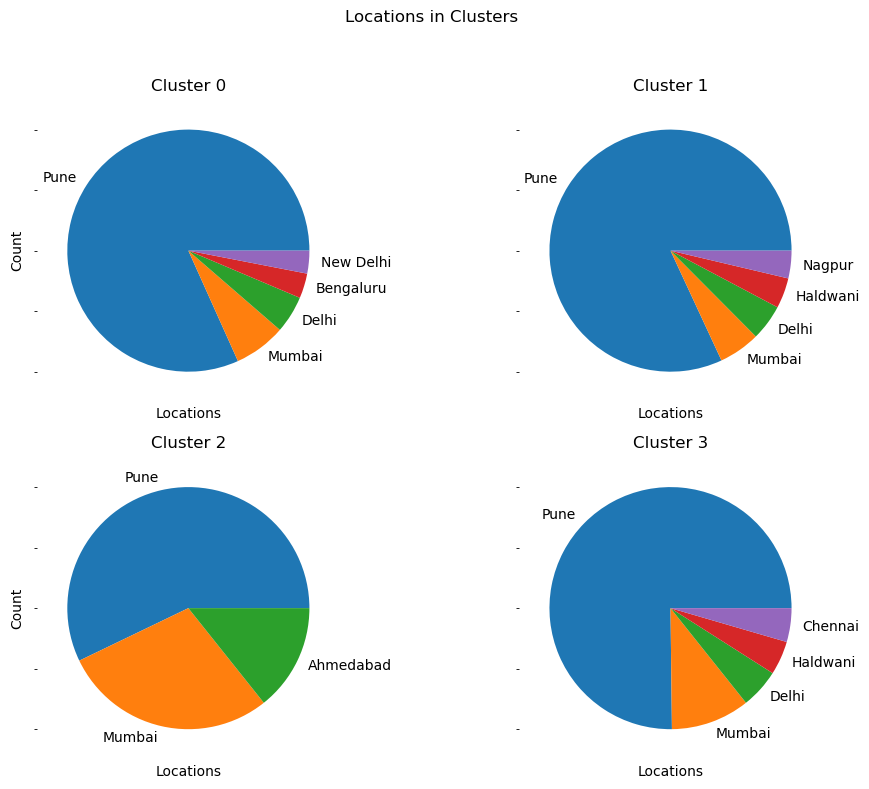

In [115]:
locations=[Cluster_0["City"].value_counts().head(),
Cluster_1["City"].value_counts().head(),
Cluster_2["City"].value_counts().head(),
Cluster_3["City"].value_counts().head()]
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle('Locations in Clusters')
for i, counts in enumerate(locations):
    ax = axs[i // 2, i % 2]
    counts.plot(kind='pie', ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Locations')
    ax.set_ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('clusters_for_locations.png')
## People living in Pune,Mumbai should be targeted most
# Delhi, Haldwani and Bengaluru should be the next city to be targeted
# Followed by Satara and Chennai

# Psychographic segments

### Marital Status

In [116]:
[Cluster_0["Marital Status"].value_counts().head(),
Cluster_1["Marital Status"].value_counts().head(),
Cluster_2["Marital Status"].value_counts().head(),
Cluster_3["Marital Status"].value_counts().head()]
## Single people should be the most targeted customers ,followed by married

[Marital Status
 Single     297
 Married    155
 Name: count, dtype: int64,
 Marital Status
 Single     218
 Married    142
 Name: count, dtype: int64,
 Marital Status
 Married    5
 Single     2
 Name: count, dtype: int64,
 Marital Status
 Single     121
 Married     60
 Name: count, dtype: int64]

### Number of Family Members

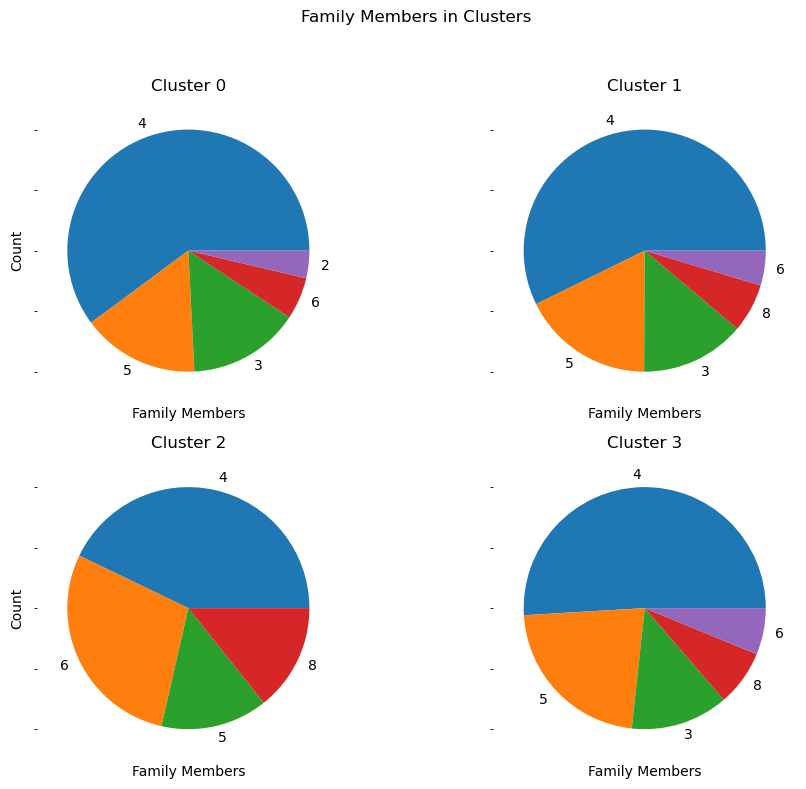

In [117]:
family=[Cluster_0["No. of Family members"].value_counts().head(),
Cluster_1["No. of Family members"].value_counts().head(),
Cluster_2["No. of Family members"].value_counts().head(),
Cluster_3["No. of Family members"].value_counts().head()]
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle('Family Members in Clusters')
for i, counts in enumerate(family):
    ax = axs[i // 2, i % 2]
    counts.plot(kind='pie', ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Family Members')
    ax.set_ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('clusters_for_family.png')
# Family having 3 to 5 family memnbers should be targeted as they are more interested in EV

### Preferable EV Type

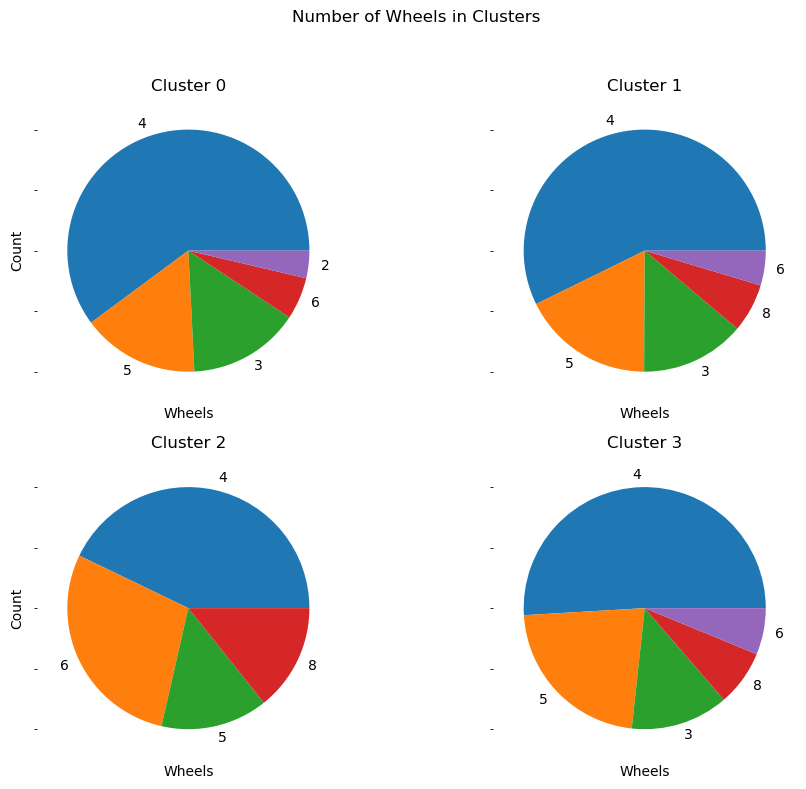

In [121]:
preferable_EV=[Cluster_0["Preference for wheels in EV"].value_counts().head(),
Cluster_1["Preference for wheels in EV"].value_counts().head(),
Cluster_2["Preference for wheels in EV"].value_counts().head(),
Cluster_3["Preference for wheels in EV"].value_counts().head()]
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle('Number of Wheels in Clusters')
for i, counts in enumerate(family):
    ax = axs[i // 2, i % 2]
    counts.plot(kind='pie', ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Wheels')
    ax.set_ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('clusters_for_Preferable_EV.png')
# 4 wheeler are more preferred EV vehicle in the market
# Followed by 2 wheeler and 3 wheeler

### Brands of Vehicles

In [122]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(),
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]
# Tata is the most preferred brand in all the cluster
# Hyundai and KIA is the 2nd best preferred brand in the market
# Followed by Honda and Nissian

[Which brand of vehicle do you currently own?
 Tata       83
 Hyundai    76
 Honda      70
 KIA        62
 Nissan     55
 Name: count, dtype: int64,
 Which brand of vehicle do you currently own?
 Tata       67
 Hyundai    58
 KIA        54
 Honda      49
 Nissan     46
 Name: count, dtype: int64,
 Which brand of vehicle do you currently own?
 Tata       3
 KIA        1
 MG         1
 Honda      1
 Hyundai    1
 Name: count, dtype: int64,
 Which brand of vehicle do you currently own?
 Tata       33
 Hyundai    30
 KIA        27
 Honda      24
 Nissan     21
 Name: count, dtype: int64]

### Preferable EV brands

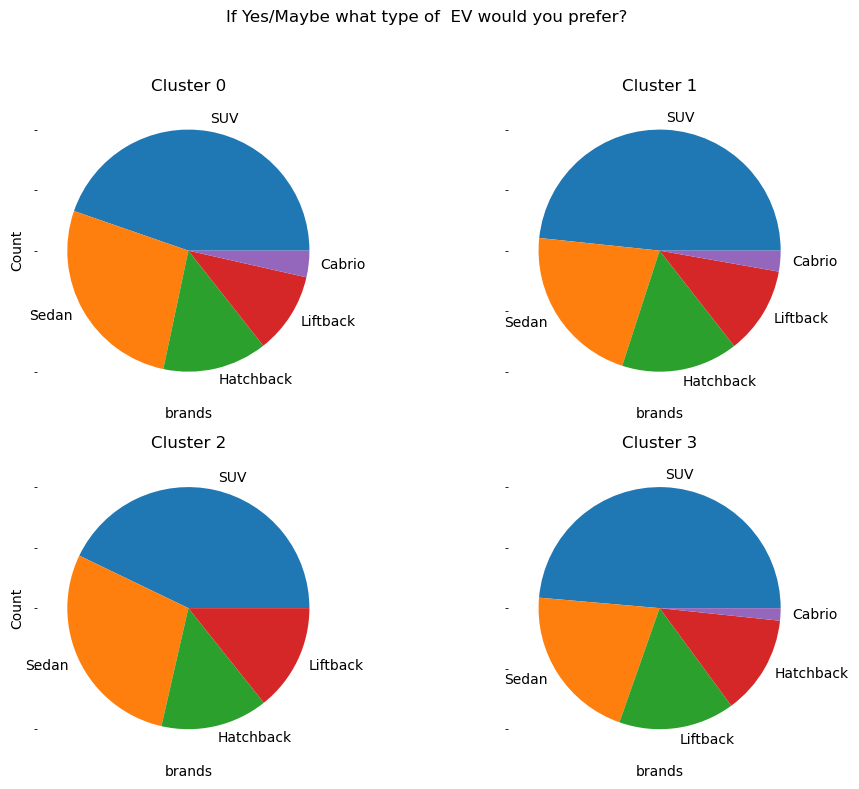

In [235]:
brand=[Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(),
Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(),
Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head(),
Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head()]
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle('If Yes/Maybe what type of  EV would you prefer?')
for i, counts in enumerate(brand):
    ax = axs[i // 2, i % 2]
    counts.plot(kind='pie', ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('brands')
    ax.set_ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('clusters_for_Preferable_EV_brand.png')
#Suv and Sedan are the most preferred EV in all the cluster
# Followed by Hatchback and Liftback being 2nd preferred EV
#Cabrio being the least preferred

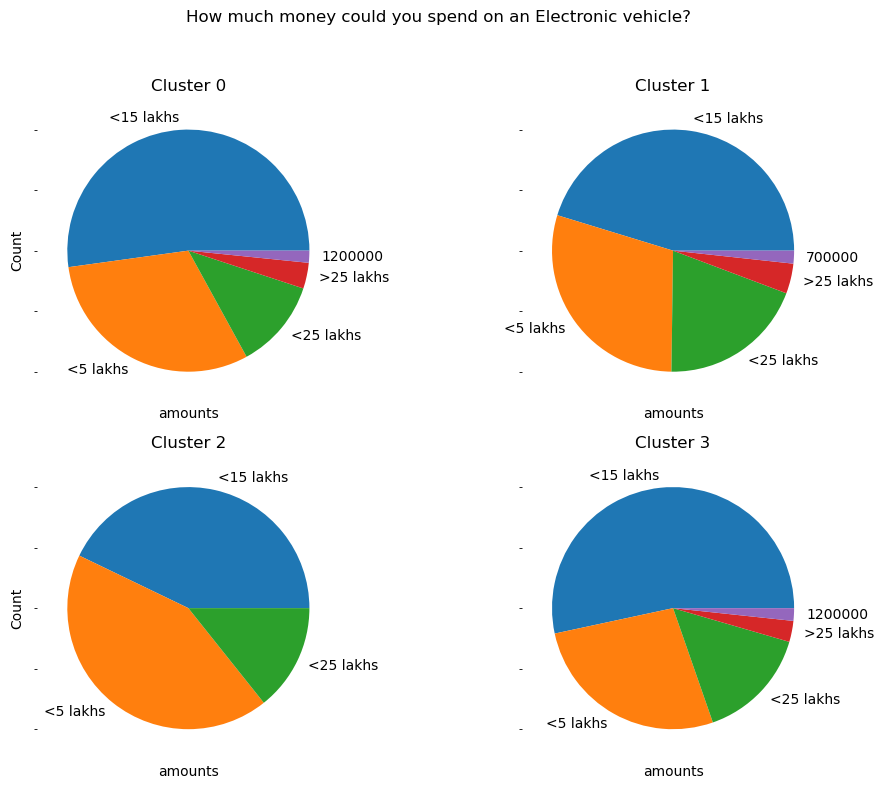

In [237]:
spending=[Cluster_0["How much money could you spend on an Electronic vehicle?"].value_counts().head(),
Cluster_1["How much money could you spend on an Electronic vehicle?"].value_counts().head(),
Cluster_2["How much money could you spend on an Electronic vehicle?"].value_counts().head(),
Cluster_3["How much money could you spend on an Electronic vehicle?"].value_counts().head()]
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle('How much money could you spend on an Electronic vehicle?')
for i, counts in enumerate(spending):
    ax = axs[i // 2, i % 2]
    counts.plot(kind='pie', ax=ax)
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('amounts')
    ax.set_ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('spending.png')

###### 48.3 % of people are willing to spend less than 15 lakhs and above 12 lakhs for EV
###### 28.8 % of people are willing to spend less than 15 lakhs for EV
###### 14.8 % of people are willing to spend less than 25 lakhs and above 15 lakhs for EV
###### 3.4 % of people are willing to spend more than 25 lakhs

# Behavioral Segmentations

### Preference for replacing all vehicles to Electronic vehicles?

In [549]:
[Cluster_0["Would you prefer replacing all your vehicles to Electronic vehicles?"].value_counts().head(),
Cluster_1["Would you prefer replacing all your vehicles to Electronic vehicles?"].value_counts().head(),
Cluster_2["Would you prefer replacing all your vehicles to Electronic vehicles?"].value_counts().head(),
Cluster_3["Would you prefer replacing all your vehicles to Electronic vehicles?"].value_counts().head()]

[Would you prefer replacing all your vehicles to Electronic vehicles?
 Yes      298
 Maybe     91
 No        63
 Name: count, dtype: int64,
 Would you prefer replacing all your vehicles to Electronic vehicles?
 Yes      234
 Maybe     74
 No        52
 Name: count, dtype: int64,
 Would you prefer replacing all your vehicles to Electronic vehicles?
 Yes    7
 Name: count, dtype: int64,
 Would you prefer replacing all your vehicles to Electronic vehicles?
 Yes      124
 Maybe     36
 No        21
 Name: count, dtype: int64]

##### 66.3% of people are willing to replace all their vehicles to EV
##### 18.8 % of people think that they might replace their vehicle to EV in future
##### Others are not interested in EV

### if Yes/Maybe then Preferable EV brands

In [550]:
print(Cluster_0['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())
print(Cluster_1['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())
print(Cluster_2['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())
print(Cluster_3['If Yes/Maybe what type of  EV would you prefer?'].value_counts().head())

#Suv and Sedan are the most preferred EV in all the cluster
# Followed by Hatchback and Liftback being 2nd preferred EV
#Cabrio being the least preferred

If Yes/Maybe what type of  EV would you prefer?
SUV          202
Sedan        122
Hatchback     63
Liftback      49
Cabrio        16
Name: count, dtype: int64
If Yes/Maybe what type of  EV would you prefer?
SUV          174
Sedan         78
Hatchback     56
Liftback      42
Cabrio        10
Name: count, dtype: int64
If Yes/Maybe what type of  EV would you prefer?
SUV          3
Sedan        2
Hatchback    1
Liftback     1
Name: count, dtype: int64
If Yes/Maybe what type of  EV would you prefer?
SUV          88
Sedan        38
Liftback     28
Hatchback    24
Cabrio        3
Name: count, dtype: int64


### Do you think Electronic Vehicles are economical?

In [551]:
[Cluster_0["Do you think Electronic Vehicles are economical?"].value_counts().head(),
Cluster_1["Do you think Electronic Vehicles are economical?"].value_counts().head(),
Cluster_2["Do you think Electronic Vehicles are economical?"].value_counts().head(),
Cluster_3["Do you think Electronic Vehicles are economical?"].value_counts().head()]

[Do you think Electronic Vehicles are economical?
 Yes      349
 Maybe     54
 No        49
 Name: count, dtype: int64,
 Do you think Electronic Vehicles are economical?
 Yes      278
 Maybe     43
 No        39
 Name: count, dtype: int64,
 Do you think Electronic Vehicles are economical?
 Yes      4
 Maybe    2
 No       1
 Name: count, dtype: int64,
 Do you think Electronic Vehicles are economical?
 Yes      137
 Maybe     24
 No        20
 Name: count, dtype: int64]

##### 76.8 % of people agreed('Yes')
##### 12.3 % of people are not sure('Maybe')
##### Others totally disagreed('No')

### Do you think Electronic vehicles will replace fuel cars in India?

In [552]:
[Cluster_0["Do you think Electronic vehicles will replace fuel cars in India?"].value_counts().head(),
Cluster_1["Do you think Electronic vehicles will replace fuel cars in India?"].value_counts().head(),
Cluster_2["Do you think Electronic vehicles will replace fuel cars in India?"].value_counts().head(),
Cluster_3["Do you think Electronic vehicles will replace fuel cars in India?"].value_counts().head()]

[Do you think Electronic vehicles will replace fuel cars in India?
 Yes, in <10 years               190
 Yes, in <20years                184
 Yes, possibly after 20 years     58
 I don't think so                 20
 Name: count, dtype: int64,
 Do you think Electronic vehicles will replace fuel cars in India?
 Yes, in <10 years               154
 Yes, in <20years                131
 Yes, possibly after 20 years     51
 I don't think so                 24
 Name: count, dtype: int64,
 Do you think Electronic vehicles will replace fuel cars in India?
 Yes, in <10 years               4
 Yes, possibly after 20 years    2
 Yes, in <20years                1
 Name: count, dtype: int64,
 Do you think Electronic vehicles will replace fuel cars in India?
 Yes, in <10 years               71
 Yes, in <20years                71
 Yes, possibly after 20 years    21
 I don't think so                18
 Name: count, dtype: int64]

##### 41.9 % of total people are very sure that electronic vehicles will replace fuel cars in India within 10 years
##### 35.2 % of total people are very sure that electronic vehicles will replace fuel cars in India within 20 years
##### 35.2 % of total people are very sure that electronic vehicles will replace fuel cars in India within 20 years
##### 13.3 % of total people are expecting that electronic vehicles will replace fuel cars in India probably after 20 years
##### Others totally disagreed